In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import os
import csv

# define some random data that emulates your indeded code:
NCURVES = 7
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Blues_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=blues)


params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "lines.linewidth": 3,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 8,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")

In [2]:
path = "quantum/"
# load the AL data
data = {}
for folder in os.listdir(path):
    if os.path.isdir(path+"/"+folder) and folder!= "__pycache__":
        print(folder)
        data[folder] = {}
        for folder2 in os.listdir(path+"/"+folder):
            if os.path.isdir(path+"/"+folder+"/"+folder2) and folder!= "__pycache__":
                print(folder2)
                # load data
                data[folder][folder2] = {}
                with open(path+"/"+folder+"/"+folder2+"/KL.csv", "r") as f:
                    reader = csv.reader(f)
                    data[folder][folder2]["KL"] = {}
                    for i, line in enumerate(reader):
                        if i >= 1:
                            data[folder][folder2]["KL"][line[0]] = {}
                            #for j in range(len(line[1:])):
                            #    print(line[j+1])
                            #    print(j)
                            #    d = line[j+1].split("[")[1].split("]")[0]
                            #    d = d.split(" ")
                            #d = line[1].split("[")[1].split("]")[0]
                            #d = d.split()
                            d_new = []
                            line = [item for item in line if item!=""]
                            #print(line[1].split("[")[1].split("]")[0].split())
                            d = (line[1].split("[")[1].split("]")[0].split())
                            for k in range(len(d)):
                                    try:
                                            d_new.append(float(d[k]))
                                    except ValueError:
                                        pass
                            #print(d_new)
                            data[folder][folder2]["KL"][line[0]][i] = d_new
                with open(path+"/"+folder+"/"+folder2+"/fidelity.csv", "r") as f:
                    reader = csv.reader(f)
                    data[folder][folder2]["rescaled fidelity"] = {}
                    for i, line in enumerate(reader):
                        if i >= 1:
                            data[folder][folder2]["rescaled fidelity"][line[0]] = {}
                            #for j in range(len(line[1:])):
                            #    print(line)
                            line = [item for item in line if item!=""]
                            #print(line[1].split("[")[1].split("]")[0].split())
                            d = (line[1].split("[")[1].split("]")[0])
                            #d = line[j+1].split("[")[1].split("]")[0]
                            data[folder][folder2]["rescaled fidelity"][line[0]][i] = [float(x) for x in d.split(",")]
                
print(data['test_number_of_configs']["GHZ"]["rescaled fidelity"])
len(data['test_number_of_samples']["AllUp"]["KL"]["100"])

test_number_of_configs
AllUp
EqualDistWithPhase
GHZ
test_number_of_samples
AllUp
EqualDistWithPhase
GHZ
{'1': {1: [0.7893900250790759, 0.8488691827526562, 0.8687214374033281, 0.8781536658603523, 0.8830905341798981, 0.8860272871544743, 0.8874597039659212, 0.8892076475813218, 0.8897627026165545, 0.8906538745210786, 0.890651277263488, 0.8911727467263241, 0.8917880548375234, 0.8918280519830406, 0.8921159742115409, 0.892213752180991, 0.892318471773937, 0.8921884423726664, 0.8928748343013283, 0.8926643745904016, 0.8927636667132436, 0.8929635055328042, 0.8930807074166746, 0.8929169556630768, 0.8929188768503286, 0.8930291589331482, 0.8934400205997769, 0.8933046593685511, 0.8931215722295471, 0.893305120443562, 0.8930473638519593, 0.8931625268843724, 0.8931243004879537, 0.892979251758454, 0.8930694192274936, 0.8931409223210137, 0.8930596086269542, 0.8932160629049792, 0.8933199733404166, 0.8932367399726594, 0.8933583217607346, 0.8933551975276656, 0.8933122965931701, 0.8935212296988513, 0.89333727

1

test_number_of_configs
KL
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
rescaled fidelity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
KL
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
rescaled fidelity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
KL
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
rescaled fidelity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
test_number_of_samples
KL
[0.0, 0.0, 0.0, 0.0, 0.0]
rescaled fidelity
[0.0, 0.0, 0.0, 0.0, 0.0]
KL
[0.0, 0.0, 0.0, 0.0, 0.0]
rescaled fidelity
[0.0, 0.0, 0.0, 0.0, 0.0]
KL
[0.0, 0.0, 0.0, 0.0, 0.0]
rescaled fidelity
[0.0, 0.0, 0.0, 0.0, 0.0]


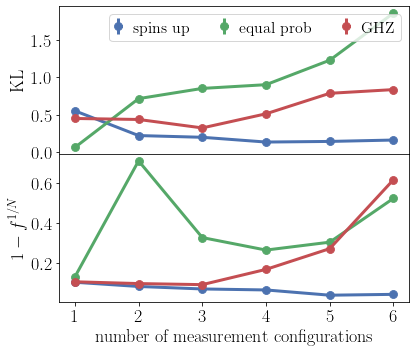

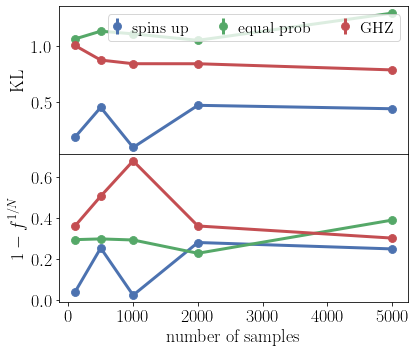

In [21]:
for tests in list(data.keys()):
    print(tests)
    fig, ax = plt.subplots(2, figsize=(6,5), sharex=True)
    for state in list(data[tests].keys()):
        for q, quantity in enumerate(list(data[tests][state].keys())):
            print(quantity)
            y = []
            y_std = []
            x = []
            for samples in list(data[tests][state][quantity].keys()):
                x.append(int(samples))
                mean = []
                for key in list(data[tests][state][quantity][samples].keys()):
                    mean.append(data[tests][state][quantity][samples][key][-1])
                if quantity == "KL":
                    y.append(np.mean(np.array(mean)))
                    y_std.append(np.std(np.array(mean)))
                else:
                    y.append(1-np.mean(np.array(mean)))
                    y_std.append(np.std(np.array(mean)))
            print(y_std)
            if state == "EqualDistWithPhase":
                 ax[q].errorbar(x, y, y_std, marker="o", label =  "equal prob")
            elif state == "AllUp":
                 ax[q].errorbar(x, y, y_std, marker="o", label =  "spins up")
            else:
                ax[q].errorbar(x, y, y_std, marker="o", label = state)
            if tests == "test_number_of_configs":
                ax[q].set_xlabel("number of measurement configurations", fontsize=18)
            else:
                ax[q].set_xlabel("number of samples", fontsize=18)
            if quantity == "KL":
                ax[q].set_ylabel(quantity, fontsize=18)
            else:
                ax[q].set_ylabel(r" $1-f^{1/N}$", fontsize=18)
            #ax[q].set_title(quantity, fontsize=18)
            if q== 0: ax[q].legend(loc="upper right", fontsize=16, ncol=3, handlelength=0.3)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0, wspace=0.01)
    plt.savefig(path.split("/")[0]+"_"+tests+".pdf", dpi=1000)